In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
dataset = pd.read_csv('winequality-red (1).csv')

In [ ]:
dataset.shape

(1599, 12)

In [ ]:
dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


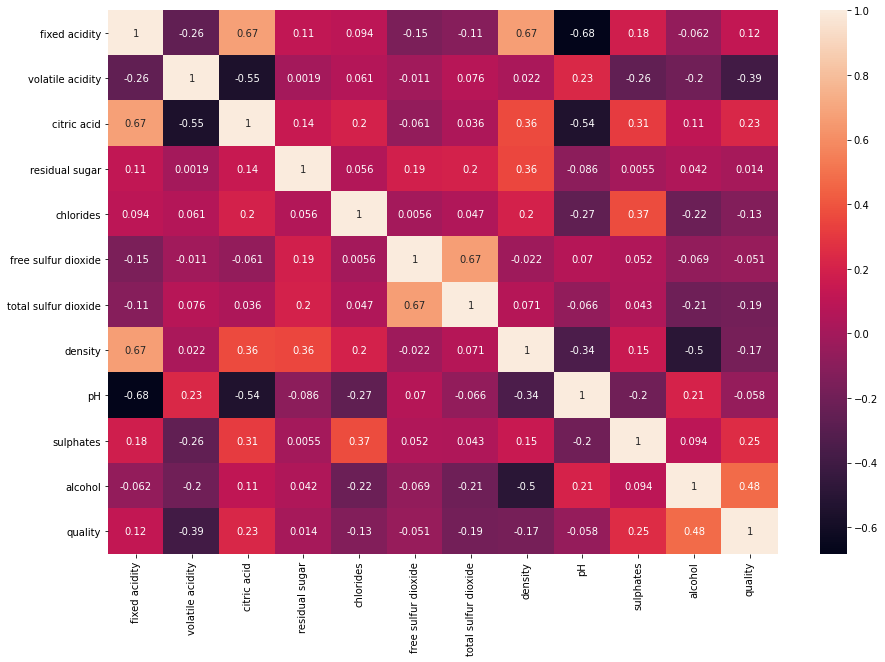

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True)

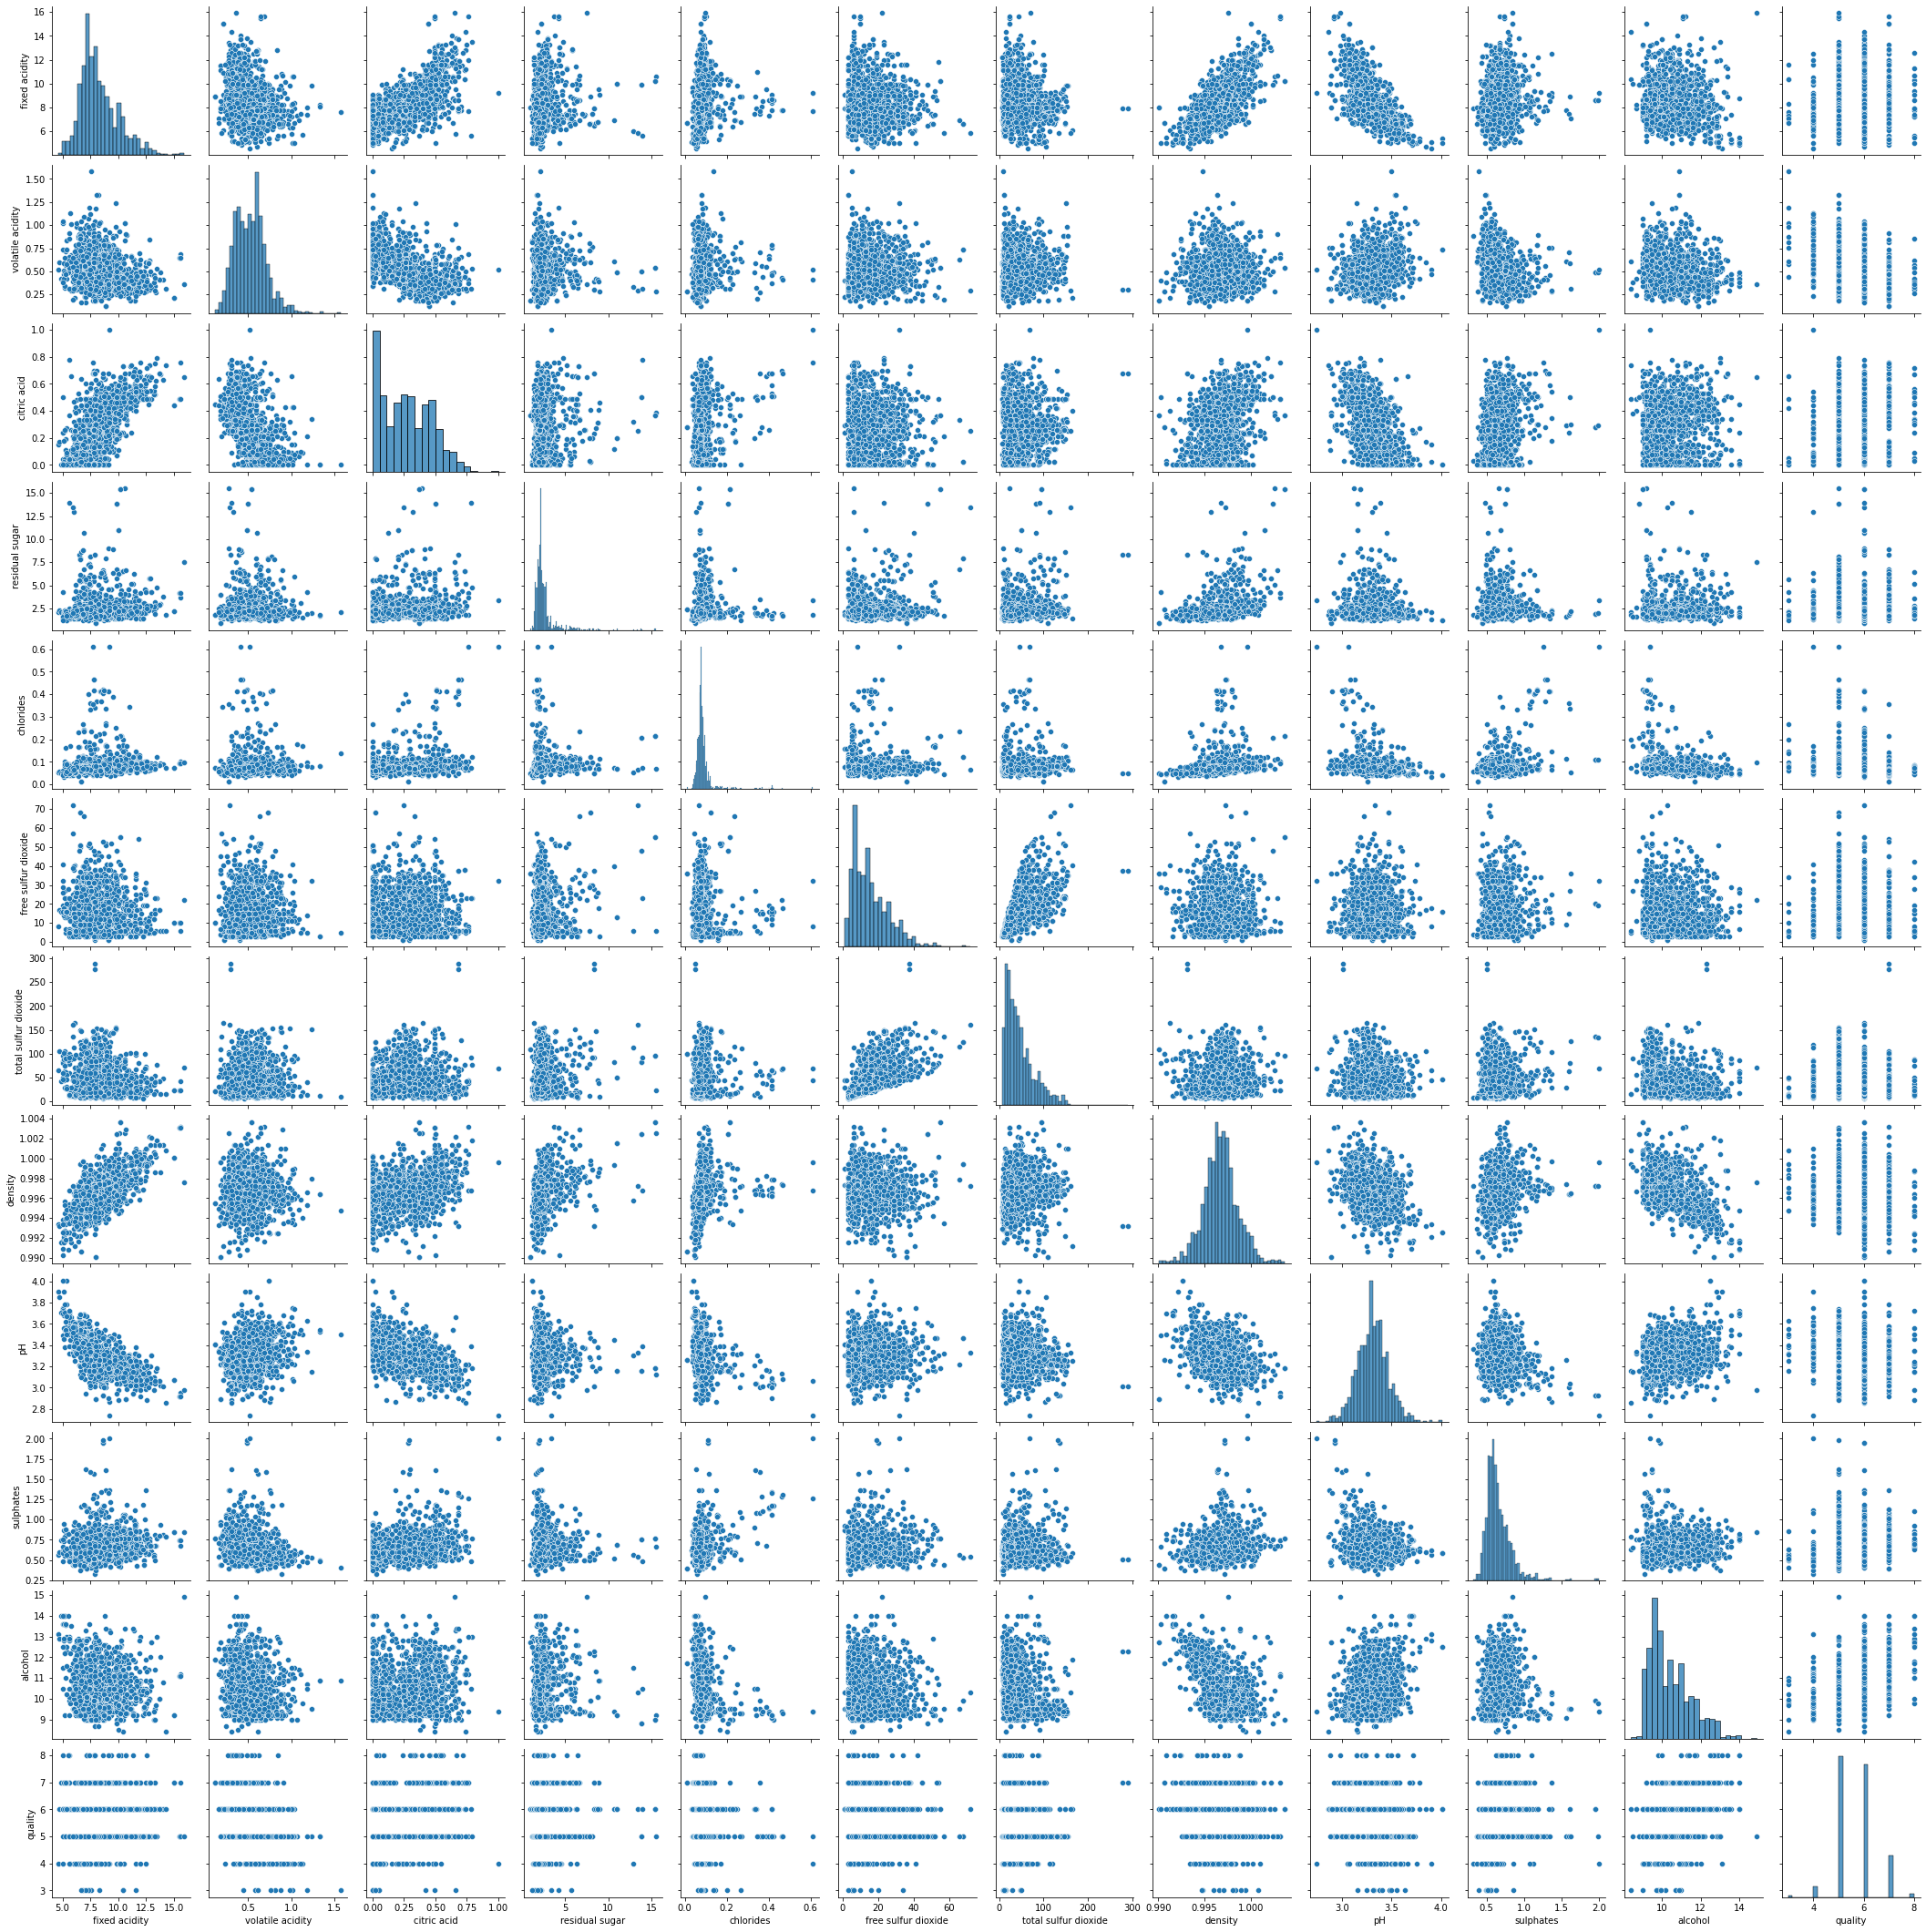

In [ ]:
sns.pairplot(dataset)

In [ ]:
#Prints the total number of null values in the dataset
print('The total null values in the dataset are ',dataset.isnull().sum().sum())

The total null values in the dataset are  0


In [ ]:
# Assigning target column to the variable Y.
X=dataset.drop(['quality'],axis=1)
Y=dataset[['quality']]
#Splitting into train and test dataset.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=22)

In [ ]:
# Building the model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

#predicting the values
y_pred=regr.predict(X_test)

In [ ]:
#Evaluating the model
print("Variance score: %.2f" % r2_score(Y_test,y_pred))
print("Mean squared error: %.2f" % mean_squared_error(Y_test,y_pred))
print('intercept:', regr.intercept_)
print('slope:', regr.coef_)
coeff = pd.DataFrame(regr.coef_.transpose(), X_train.columns, columns=['slope'])
coeff


Variance score: 0.33
Mean squared error: 0.39
intercept: [2.04355209]
slope: [[-2.48144990e-03 -1.30082064e+00 -1.85999720e-01  9.76855022e-03
  -2.02076816e+00  1.28235434e-03 -3.11356838e-03  2.60130461e+00
  -4.57917628e-01  9.64024381e-01  2.80573686e-01]]


,slope
fixed acidity,-0.002481
volatile acidity,-1.300821
citric acid,-0.186000
residual sugar,0.009769
chlorides,-2.020768
free sulfur dioxide,0.001282
total sulfur dioxide,-0.003114
density,2.601305
pH,-0.457918
sulphates,0.964024


In [ ]:
#Calaculating the top 3 correlated variables
numeric_features = dataset.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print('Top 3 correlated variables to the target varialble quality is: ')
print(corr['quality'].sort_values(ascending=False)[:3],'\n')


Top 3 correlated variables to the target varialble quality is: 
quality      1.000000
alcohol      0.476166
sulphates    0.251397
Name: quality, dtype: float64 



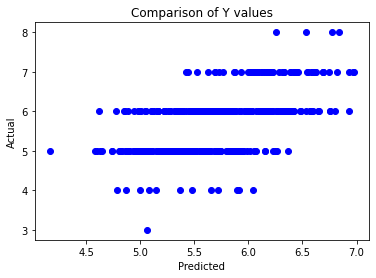

In [ ]:
plt.title('Comparison of Y values')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.scatter(y_pred, Y_test,  color='blue')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


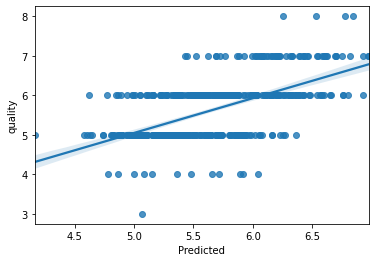

In [ ]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.regplot(y_pred, Y_test,data=dataset)